Data acquired from https://www.kaggle.com/datasets/jamiewelsh2/nba-per-game-player-statistics-2022-2023-season

The goal for this notebook was to build a model to classify NBA players by position based on a variety of statistics. 

In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Creating a function to save graphics created in this notebook
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "nba_graphs"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
nba_data = pd.read_csv('nba_per_game_processed.csv')
nba = nba_data.copy()

In [3]:
nba.head()

,Index,Player Name,Position,Age,Team,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01


In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
nba['Position'].value_counts()

Position
SG       126
C        108
SF       103
PF       102
PG        91
SG-PG      2
SF-SG      2
PG-SG      2
SF-PF      1
PF-C       1
PF-SF      1
Name: count, dtype: int64

In [6]:
# changing multiple position players to the first defined position because there aren't enough in the dataset 
# at their defined dual position (1 or 2 at the most compared to the next lowest which is 91)

nba.loc[nba['Position']=='SG-PG', 'Position']='SG'
nba.loc[nba['Position']=='SF-SG', 'Position']='SF'
nba.loc[nba['Position']=='PG-SG', 'Position']='PG'
nba.loc[nba['Position']=='SF-PF', 'Position']='SF'
nba.loc[nba['Position']=='PF-C', 'Position']='PF'
nba.loc[nba['Position']=='PF-SF', 'Position']='PF'

In [7]:
nba['Position'].value_counts()

Position
SG    128
C     108
SF    106
PF    104
PG     93
Name: count, dtype: int64

In [8]:
nba.isna().sum()

Index                 0
Player Name           0
Position              0
Age                   0
Team                  0
GP                    0
GS                    0
MP                    0
FG                    0
FGA                   0
FG%                   2
3P                    0
3PA                   0
3P%                  16
2P                    0
2PA                   0
2P%                   5
eFG%                  2
FT                    0
FTA                   0
FT%                  24
ORB                   0
DRB                   0
TRB                   0
AST                   0
STL                   0
BLK                   0
TOV                   0
PF                    0
PTS                   0
Player-additional     0
dtype: int64

In [9]:
nba[pd.isnull(nba['FT%'])][['FT', 'FTA', 'FT%']]

,FT,FTA,FT%
14,0.0,0.0,NaN
47,0.0,0.0,NaN
66,0.0,0.0,NaN
72,0.0,0.0,NaN
73,0.0,0.0,NaN
87,0.0,0.0,NaN
125,0.0,0.0,NaN
128,0.0,0.0,NaN
130,0.0,0.0,NaN
150,0.0,0.0,NaN


In [10]:
nba[pd.isnull(nba['3P%'])][['3P', '3PA', '3P%']]

,3P,3PA,3P%
17,0.0,0.0,NaN
42,0.0,0.0,NaN
65,0.0,0.0,NaN
81,0.0,0.0,NaN
97,0.0,0.0,NaN
150,0.0,0.0,NaN
155,0.0,0.0,NaN
265,0.0,0.0,NaN
340,0.0,0.0,NaN
384,0.0,0.0,NaN


In [11]:
nba[pd.isnull(nba['FG%'])][['FG', 'FGA', 'FG%', 'eFG%']]

,FG,FGA,FG%,eFG%
150,0.0,0.0,NaN,NaN
514,0.0,0.0,NaN,NaN


In [12]:
nba[pd.isnull(nba['2P%'])][['2P','2PA', '2P%']]

,2P,2PA,2P%
150,0.0,0.0,NaN
165,0.0,0.0,NaN
262,0.0,0.0,NaN
481,0.0,0.0,NaN
514,0.0,0.0,NaN


In [13]:
# All null values were for stats with no attempts made. For the sake of simplicity I replaced them all with 0. 
nba.fillna(0, inplace = True)
nba.isna().sum()

Index                0
Player Name          0
Position             0
Age                  0
Team                 0
GP                   0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Player-additional    0
dtype: int64

In [14]:
# dropping features with no relationship to position
nba = nba.drop(columns=['Index', 'Player Name', 'Player-additional', 'Team'])

In [15]:
# Trying to get all features within correlation values of less than .8 and greater than -.8 with each other, and all VIFs <= 10 
# to minimize multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
nba_vif = nba.drop('Position', axis = 1)
nba_vif = add_constant(nba_vif)
vif_df = pd.DataFrame()
vif_df['features'] = nba_vif.columns
vif_df['vif'] = [variance_inflation_factor(nba_vif.values, i)
                    for i in range(len(nba_vif.columns))]
vif_df

,features,vif
0,const,91.078776
1,Age,1.121597
2,GP,2.214838
3,GS,3.888644
4,MP,16.515355
5,FG,6612.298349
6,FGA,11323.464423
7,FG%,30.378072
8,3P,585.916153
9,3PA,2360.090154


In [16]:
nba = nba.drop(columns=['FGA', '3PA', '2PA', 'FT', 'TRB'])

In [17]:
nba_vif = nba.drop('Position', axis = 1)
nba_vif = add_constant(nba_vif)
vif_df = pd.DataFrame()
vif_df['features'] = nba_vif.columns
vif_df['vif'] = [variance_inflation_factor(nba_vif.values, i)
                    for i in range(len(nba_vif.columns))]
vif_df

,features,vif
0,const,68.264014
1,Age,1.107657
2,GP,2.185021
3,GS,3.861030
4,MP,15.808740
5,FG,3416.767100
6,FG%,27.940495
7,3P,388.089528
8,3P%,2.119827
9,2P,1872.727500


In [18]:
nba = nba.drop(columns=['MP', 'FG', '3P', '2P', 'FTA', 'PTS'])

In [19]:
nba_vif = nba.drop('Position', axis = 1)
nba_vif = add_constant(nba_vif)
vif_df = pd.DataFrame()
vif_df['features'] = nba_vif.columns
vif_df['vif'] = [variance_inflation_factor(nba_vif.values, i)
                    for i in range(len(nba_vif.columns))]
vif_df

,features,vif
0,const,64.426294
1,Age,1.095765
2,GP,2.015282
3,GS,2.924952
4,FG%,14.276168
5,3P%,2.016305
6,2P%,2.956196
7,eFG%,13.242242
8,FT%,1.331175
9,ORB,3.413838


In [23]:
nba.corr(numeric_only=True)[['FG%', 'eFG%', 'TOV']]

,FG%,eFG%,TOV
Age,0.070309,0.125396,0.077355
GP,0.230166,0.262181,0.404578
GS,0.183023,0.177294,0.643229
FG%,1.000000,0.916949,0.152158
3P%,0.043088,0.300061,0.143573
2P%,0.779072,0.736527,0.064482
eFG%,0.916949,1.000000,0.116204
FT%,0.049898,0.129048,0.235111
ORB,0.480519,0.310410,0.293349
DRB,0.352410,0.283049,0.679979


In [24]:
nba = nba.drop(columns=['FG%', 'TOV'])
nba_vif = nba.drop('Position', axis = 1)
nba_vif = add_constant(nba_vif)
vif_df = pd.DataFrame()
vif_df['features'] = nba_vif.columns
vif_df['vif'] = [variance_inflation_factor(nba_vif.values, i)
                    for i in range(len(nba_vif.columns))]
vif_df

,features,vif
0,const,63.006211
1,Age,1.061731
2,GP,2.002511
3,GS,2.859673
4,3P%,1.658228
5,2P%,2.731904
6,eFG%,3.126549
7,FT%,1.317645
8,ORB,2.999854
9,DRB,4.006266


In [25]:
nba_num = nba.drop('Position', axis=1)
nba_num.corr()

,Age,GP,GS,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,PF
Age,1.000000,0.080564,0.095957,0.106404,0.090657,0.125396,0.128845,-0.019278,0.106741,0.166771,0.080247,0.022212,0.078069
GP,0.080564,1.000000,0.641064,0.171061,0.198036,0.262181,0.368063,0.325323,0.506849,0.340165,0.414046,0.310445,0.514726
GS,0.095957,0.641064,1.000000,0.084236,0.113243,0.177294,0.236201,0.407388,0.681401,0.566952,0.563894,0.403713,0.610872
3P%,0.106404,0.171061,0.084236,1.000000,-0.019733,0.300061,0.248703,-0.230744,0.022536,0.175227,0.165695,-0.124210,0.089528
2P%,0.090657,0.198036,0.113243,-0.019733,1.000000,0.736527,0.176887,0.307414,0.248475,-0.017440,-0.013446,0.250789,0.247026
eFG%,0.125396,0.262181,0.177294,0.300061,0.736527,1.000000,0.129048,0.310410,0.283049,0.037721,0.073195,0.252130,0.288132
FT%,0.128845,0.368063,0.236201,0.248703,0.176887,0.129048,1.000000,-0.021179,0.179961,0.246259,0.211434,0.055506,0.229070
ORB,-0.019278,0.325323,0.407388,-0.230744,0.307414,0.310410,-0.021179,1.000000,0.684367,0.093644,0.195129,0.638469,0.561203
DRB,0.106741,0.506849,0.681401,0.022536,0.248475,0.283049,0.179961,0.684367,1.000000,0.499652,0.459418,0.593731,0.709439
AST,0.166771,0.340165,0.566952,0.175227,-0.017440,0.037721,0.246259,0.093644,0.499652,1.000000,0.652689,0.089857,0.463605


In [26]:
# Checking that all columns in the correlation matrix are within -.8 - .8 correlation. Each column shoud have only one row
# containing a value outside that range which measures the correlation of that feature with itself (it is equal to 1).
b = nba_num.corr()
for i in b.columns:
    j = b.loc[(b[i]>=.8) | (b[i]<=-.8)].shape[0]
    print(f"{i}: {j}")

Age: 1
GP: 1
GS: 1
3P%: 1
2P%: 1
eFG%: 1
FT%: 1
ORB: 1
DRB: 1
AST: 1
STL: 1
BLK: 1
PF: 1


In [27]:
from sklearn.model_selection import train_test_split
nba_train, nba_test = train_test_split(nba, test_size = 0.33, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
nba_train_features = nba_train.drop('Position', axis=1)
nba_train_labels = nba_train['Position'].copy()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_pipe = Pipeline([('scaler', StandardScaler()),
                     ('log_reg', LogisticRegression())])

In [31]:
param_grid = {'log_reg__C':[.8, .9, 1.0, 1.1, 1.2, 1.3],
              'log_reg__tol':[1e-2, 1e-3, 1e-4, 1e-5],
              'log_reg__solver':['liblinear', 'lbfgs']}
gs_log = GridSearchCV(log_pipe, param_grid, cv=3, scoring='accuracy')
gs_log.fit(nba_train_features, nba_train_labels)
print('The best parameters are: ', gs_log.best_params_)

The best parameters are:  {'log_reg__C': 1.2, 'log_reg__solver': 'liblinear', 'log_reg__tol': 0.01}


In [32]:
param_grid = {'log_reg__C':[1.0, 1.1, 1.2, 1.3],
              'log_reg__tol':[1, .1, .01, .001, 1e-4],
              'log_reg__solver':['liblinear', 'lbfgs']}
gs_log = GridSearchCV(log_pipe, param_grid, cv=3, scoring='accuracy')
gs_log.fit(nba_train_features, nba_train_labels)
print('The best parameters are: ', gs_log.best_params_)

The best parameters are:  {'log_reg__C': 1.2, 'log_reg__solver': 'liblinear', 'log_reg__tol': 0.01}


In [33]:
best_log = Pipeline([('scaler', StandardScaler()),
                    ('log_reg', LogisticRegression(solver='liblinear', C=1.2, tol=0.01, random_state=42))])
best_log.fit(nba_train_features, nba_train_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=1.2, random_state=42, solver='liblinear',
                                    tol=0.01))])

In [34]:
from sklearn.svm import SVC
pipe_svc = Pipeline([('scaler', StandardScaler()),
                     ('svc', SVC(random_state=42))])

In [35]:
param_grid = {'svc__tol':[.1, .01, .001, 1e-4, 1e-5],
              'svc__C':[0.8, 0.9, 1.0, 1.1, 1.2],
              'svc__gamma':['auto', 'scale']}
gs_svc = GridSearchCV(pipe_svc, param_grid, cv=3, scoring='accuracy')
gs_svc.fit(nba_train_features, nba_train_labels)
print('The best parameters are: ', gs_svc.best_params_)

The best parameters are:  {'svc__C': 1.0, 'svc__gamma': 'auto', 'svc__tol': 0.1}


In [36]:
param_grid = {'svc__tol':[1.1, 1, .1, .01],
              'svc__C':[0.8, 0.9, 1.0, 1.1, 1.2],
              'svc__gamma':['auto', 'scale']}
gs_svc = GridSearchCV(pipe_svc, param_grid, cv=3, scoring='accuracy')
gs_svc.fit(nba_train_features, nba_train_labels)
print('The best parameters are: ', gs_svc.best_params_)

The best parameters are:  {'svc__C': 1.0, 'svc__gamma': 'auto', 'svc__tol': 0.1}


In [37]:
best_svc = Pipeline([('scaler', StandardScaler()),
                     ('svc', SVC(gamma='auto', C=1.0, tol=0.1, random_state=42))])
best_svc.fit(nba_train_features, nba_train_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', random_state=42, tol=0.1))])

In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def scores(model, features, labels):
    preds = model.predict(features)
    ps = precision_score(labels, preds, average='micro')
    rs = recall_score(labels, preds, average='micro')
    accs = accuracy_score(labels, preds)
    print("Precision Score: ", ps)
    print("Recall Score: ", rs)
    print("Accuracy Score: ", accs)

In [39]:
scores(best_log, nba_train_features, nba_train_labels)

Precision Score:  0.5789473684210527
Recall Score:  0.5789473684210527
Accuracy Score:  0.5789473684210527


In [40]:
scores(best_svc, nba_train_features, nba_train_labels)

Precision Score:  0.6759002770083102
Recall Score:  0.6759002770083102
Accuracy Score:  0.6759002770083102


In [41]:
svc_scores_train = best_svc.decision_function(nba_train_features)
log_scores_train = best_log.decision_function(nba_train_features)

In [42]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer().fit(nba_train_labels)
lb_train = lb.transform(nba_train_labels)

Text(0.5, 1.0, 'ROC Curve')

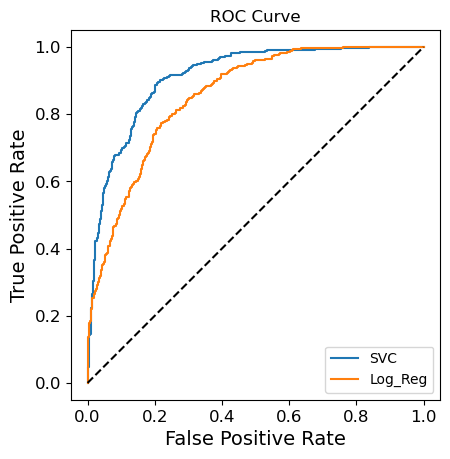

In [43]:
from sklearn.metrics import auc, roc_curve

fpr_train, tpr_train, roc_auc_train = dict(), dict(), dict()
fpr_train["svc"], tpr_train["svc"], _ = roc_curve(lb_train.ravel(), svc_scores_train.ravel())
fpr_train["log"], tpr_train["log"], _ = roc_curve(lb_train.ravel(), log_scores_train.ravel())
roc_auc_train["svc"] = auc(fpr_train["svc"], tpr_train["svc"])
roc_auc_train["log"] = auc(fpr_train["log"], tpr_train["log"])
plt.plot(fpr_train["svc"], tpr_train["svc"], label='SVC')
plt.plot(fpr_train["log"], tpr_train["log"], label='Log_Reg')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('square')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [44]:
AUC = {'SVC':roc_auc_train["svc"], 'Log_Reg':roc_auc_train["log"]}
for model in AUC:
    print(f"{model} AUC score: {AUC[model]:.2f}")

SVC AUC score: 0.91
Log_Reg AUC score: 0.85


In [45]:
nba_test_features = nba_test.drop('Position', axis=1)
nba_test_labels = nba_test['Position'].copy()

In [46]:
lb_test = lb.transform(nba_test_labels)

Saving figure ROC Curve


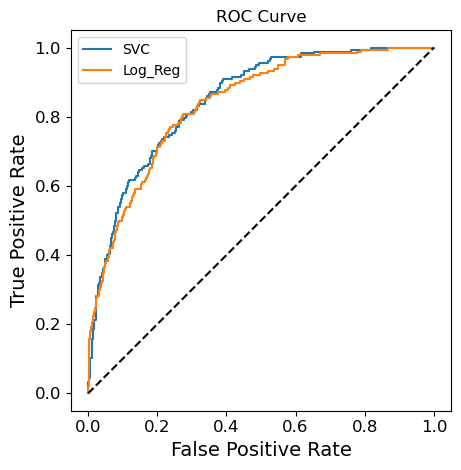

In [47]:
svc_scores_test = best_svc.decision_function(nba_test_features)
log_scores_test = best_log.decision_function(nba_test_features)
fpr_test, tpr_test, roc_auc_test = dict(), dict(), dict()
fpr_test["svc"], tpr_test["svc"], _ = roc_curve(lb_test.ravel(), svc_scores_test.ravel())
fpr_test["log"], tpr_test["log"], _ = roc_curve(lb_test.ravel(), log_scores_test.ravel())
roc_auc_test["svc"] = auc(fpr_test["svc"], tpr_test["svc"])
roc_auc_test["log"] = auc(fpr_test["log"], tpr_test["log"])
plt.plot(fpr_test["svc"], tpr_test["svc"], label='SVC')
plt.plot(fpr_test["log"], tpr_test["log"], label='Log_Reg')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('square')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
save_fig('ROC Curve')

In [48]:
AUC = {'SVC':roc_auc_test["svc"], 'Log_Reg':roc_auc_test["log"]}
for model in AUC:
    print(f"{model} AUC score: {AUC[model]:.2f}")

SVC AUC score: 0.85
Log_Reg AUC score: 0.84


In [49]:
scores(best_log, nba_test_features, nba_test_labels)

Precision Score:  0.5955056179775281
Recall Score:  0.5955056179775281
Accuracy Score:  0.5955056179775281


In [50]:
scores(best_svc, nba_test_features, nba_test_labels)

Precision Score:  0.5898876404494382
Recall Score:  0.5898876404494382
Accuracy Score:  0.5898876404494382


Saving figure ROC by Class


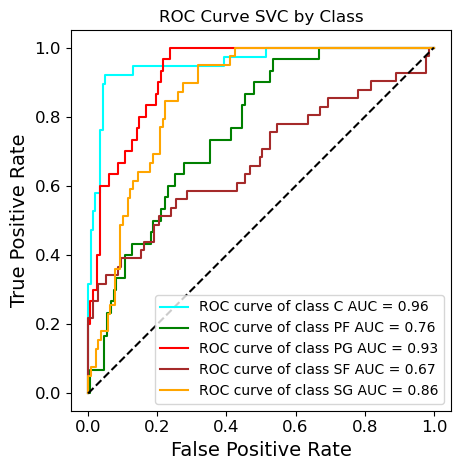

In [51]:
fpr_svc, tpr_svc, roc_auc_svc = dict(), dict(), dict()
n_classes = 5
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(lb_test[:, i], svc_scores_test[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])
colors = ['cyan', 'green', 'red', 'brown', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, label=f"ROC curve of class {best_svc.classes_[i]} AUC = {roc_auc_svc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('square')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC by Class')
save_fig('ROC by Class')

Text(0.5, 1.0, 'ROC Curve Log_Reg by Class')

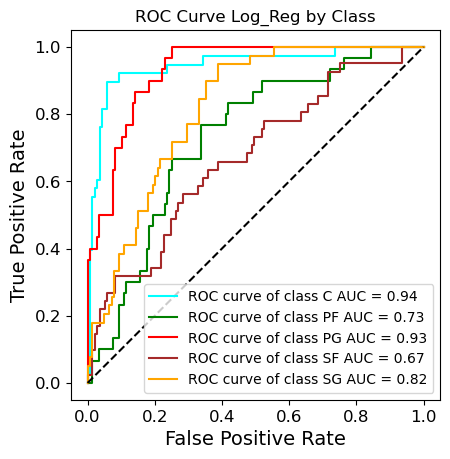

In [52]:
fpr_log, tpr_log, roc_auc_log = dict(), dict(), dict()
n_classes = 5
for i in range(n_classes):
    fpr_log[i], tpr_log[i], _ = roc_curve(lb_test[:, i], log_scores_test[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])
colors = ['cyan', 'green', 'red', 'brown', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_log[i], tpr_log[i], color=color, label=f"ROC curve of class {best_log.classes_[i]} AUC = {roc_auc_log[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('square')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Log_Reg by Class')

In [53]:
svc_preds = best_svc.predict(nba_test_features)
log_preds = best_log.predict(nba_test_features)

Saving figure Confusion Matrix


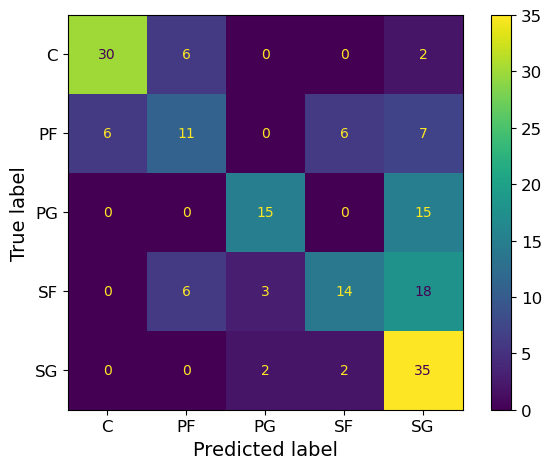

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(nba_test_labels, svc_preds)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc.classes_)
cmd.plot()
save_fig('Confusion Matrix')
plt.show()

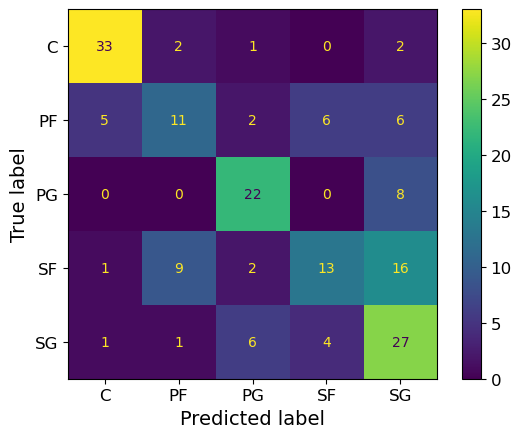

In [55]:
cm_log = confusion_matrix(nba_test_labels, log_preds)
cmd_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=best_log.classes_)
cmd_log.plot()
plt.show()